<a href="https://colab.research.google.com/github/ChihabEddine98/ML_Go/blob/master/lecture_1/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import time
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets
from google.colab import files
files.upload()
# End Imports

{}

 Ellapsed time : 0.001819610595703125 
[100.834919    13.45034998]
[[ 1.          0.69367723]
 [ 1.          0.43412612]
 [ 1.         -0.30365201]
 [ 1.         -0.68098827]
 [ 1.         -2.98644167]
 [ 1.          0.07992617]
 [ 1.          0.76243872]
 [ 1.          0.52835822]
 [ 1.         -1.33422869]
 [ 1.          0.17587147]
 [ 1.         -0.20843277]
 [ 1.          0.03069796]
 [ 1.         -0.57423778]
 [ 1.          1.56901072]
 [ 1.         -0.53003891]
 [ 1.         -0.27954525]
 [ 1.          1.24309222]
 [ 1.         -0.95651133]
 [ 1.          1.09174555]
 [ 1.          0.06923219]
 [ 1.         -0.44828564]
 [ 1.         -0.40347195]
 [ 1.         -1.05431658]
 [ 1.         -0.02984363]
 [ 1.         -0.1908574 ]
 [ 1.         -1.00474134]
 [ 1.         -0.58646002]
 [ 1.          1.20982275]
 [ 1.          0.86722833]
 [ 1.          1.26143242]
 [ 1.         -0.12473343]
 [ 1.         -1.07990953]
 [ 1.          2.82504554]
 [ 1.         -0.90754869]
 [ 1.         -

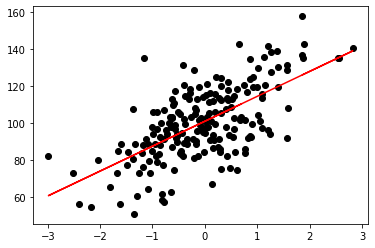

In [22]:
# Load data
X,Y,coef= datasets.make_regression(n_samples=200, n_features=1, n_targets=1, bias=100.0, noise=15, shuffle=True,coef=True)
plt.plot(X,Y, 'ko')

# Question 01 : 1 @ X
X = np.concatenate([np.full((X.shape[0],1),1),X], axis = 1)

# Question 02 : beta
t_before = time.time()
XtX , XtY = X.T.dot(X) , X.T.dot(Y) 
beta = np.linalg.inv(XtX).dot(XtY)
t_after = time.time()
print(f' Ellapsed time : {t_after - t_before} ')
print(beta)
plt.plot(X[:,1],X.dot(beta),'r')

# Question 03 : (QR).T*QR*beta = (QR).T*Y
#          iff  R.T*R*beta = R.T*Q.T*Y

# Question 04 : beta = (R.T)**(-1)*Q.T*Y


In [ ]:
# Question 05 : 
t_before = time.time()
Q , R = np.linalg.qr(X)
beta_qr = np.linalg.solve(R, Q.T @ Y )
t_after = time.time()
print(f' Ellapsed time : {t_after - t_before} ')
print(beta_qr)

 Ellapsed time : 0.019279003143310547 
[98.90957661 59.68661447]


Ellapsed time : 0.003750324249267578


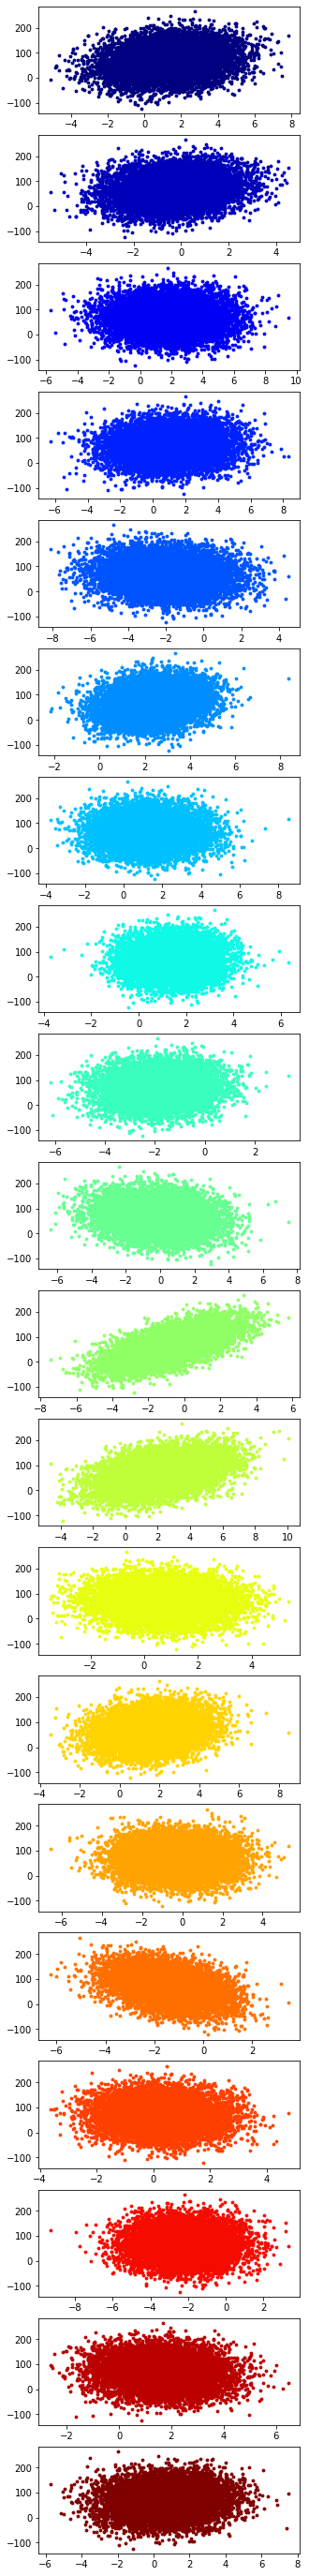

In [ ]:
# Load Data
data = np.load('demo-linear.npz')
X , Y  = data['X'] , data['Y']
data.close()
m = X.shape[1]


# Plot all marginales Y = F(X_j)
fig , axs = plt.subplots(m , 1 , figsize = (5,50))
colors = plt.cm.jet(np.linspace(0,1,m))
for j in range(m):
  axs[j].scatter(X[:,j],Y, marker = 'o', color = colors[j], s = 8)


# Question 01 : Add one in first column of X
# ALt : np.append(np.ones((X.shape[0],1)),X)
X = np.concatenate([np.full((X.shape[0],1),1),X],axis = 1)

# Question 02 : solve the optimization problem , to compute beta = (X^t*X)^-1 X^t*Y  
t_before = time.time()
XtX = X.T.dot(X)
XtY = X.T.dot(Y) 
beta = np.linalg.inv(XtX).dot(XtY)
t_after = time.time()
print(f'Ellapsed time : {t_after-t_before}')